In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/WineQT.csv')
print("\nData info")
print(data.info())
print("\nData Description")
print(data.describe())


Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

Data Description
       fixed acidity  volatile acidity  c

In [ ]:
print("Sample data")
data.head()

Sample data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Data Preprocessing

In [ ]:
# Check missing values
print("\nMissing values:")
print(data.isnull().sum())


# Check the frequency distribution of values in numerical variables
print("\nFrequency Distribution of Numerical Variables:")
for col in data.select_dtypes(include=np.number).columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())

# Check the frequency counts of categorical variables
print("\nFrequency Counts of Categorical Variables:")
for col in data.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())

# Split the data into features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Ordinal encode categorical target variable (if any)
encoder = OrdinalEncoder()
y = encoder.fit_transform(y.values.reshape(-1, 1)).flatten()


Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Frequency Distribution of Numerical Variables:

Column: fixed acidity
fixed acidity
7.2     43
7.1     41
7.0     40
7.8     40
7.5     37
        ..
4.6      1
13.7     1
13.4     1
13.5     1
12.2     1
Name: count, Length: 91, dtype: int64

Column: volatile acidity
volatile acidity
0.600    32
0.500    32
0.430    31
0.390    29
0.580    28
         ..
1.035     1
0.565     1
0.865     1
0.965     1
0.160     1
Name: count, Length: 135, dtype: int64

Column: citric acid
citric acid
0.00    99
0.49    47
0.24    42
0.02    35
0.01    26
        ..
0.61     1
0.72     1
1.00     1
0.75     1
0.62     1
Name: count, Length:

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\nData types in X_train:")
print(X_train.dtypes)


Shape of X_train: (914, 12)
Shape of X_test: (229, 12)

Data types in X_train:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
Id                        int64
dtype: object


In [ ]:
# Model Creation
model = RandomForestClassifier(random_state=42)

# Model Training
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0)

print("\nAccuracy Score:", accuracy)
print("\nClassification Report:\n", cr)


Accuracy Score: 0.6812227074235808

Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         6
         2.0       0.73      0.75      0.74        96
         3.0       0.63      0.70      0.66        99
         4.0       0.75      0.58      0.65        26
         5.0       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define features (X) and target variable (y)
X = data.drop('quality', axis=1)  # Features
y = data['quality']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.2979729257641922
R² Score: 0.46453299294085415



Feature Importances Plot


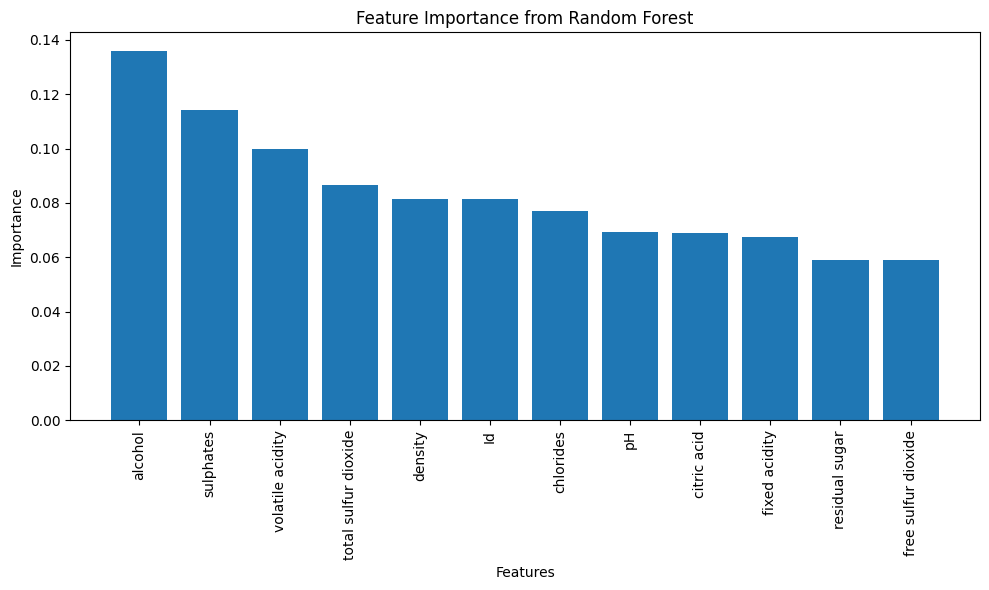

In [ ]:
# Visualization
print("\nFeature Importances Plot")
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


***Insights & Stats***

Feature Importance (Coefficients):
                 feature  importance
10               alcohol    0.135963
9              sulphates    0.114071
1       volatile acidity    0.099874
6   total sulfur dioxide    0.086672
7                density    0.081455
11                    Id    0.081340
4              chlorides    0.077172
8                     pH    0.069132
2            citric acid    0.068917
0          fixed acidity    0.067407
3         residual sugar    0.059073
5    free sulfur dioxide    0.058925

Descriptive Statistics of Target Variable:
count    1143.000000
mean        2.657043
std         0.805824
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
dtype: float64

Distribution of Target Variable:


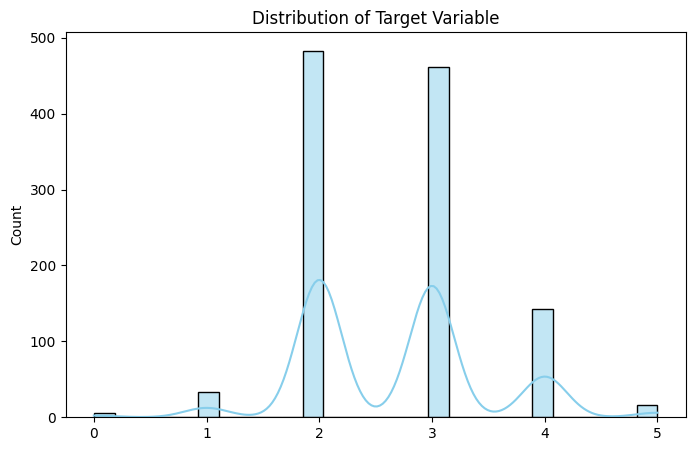


Descriptive Statistics of Numerical Features:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
m

In [ ]:
# Insights and Stats
print("\n***Insights & Stats***")

# Feature Importance
print("\nFeature Importance (Coefficients):")
print(feature_importance)

#Descriptive statistics of target variable
print("\nDescriptive Statistics of Target Variable:")
print(pd.Series(y).describe())


# Distribution of target variable
print("\nDistribution of Target Variable:")
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, color='skyblue')
plt.title("Distribution of Target Variable")
plt.show()

# Descriptive statistics of numerical features
print("\nDescriptive Statistics of Numerical Features:")
print(X.describe())